In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
%matplotlib inline

In [4]:
train_data = pd.read_csv('./DATA/titanic_train.csv')

In [5]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


1. We should find missing data and make a decision about them

In [7]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

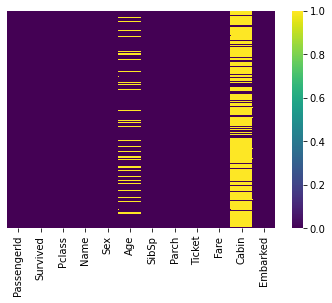

In [8]:
sns.heatmap(train_data.isnull(),cmap='viridis', yticklabels=False)

In [9]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<AxesSubplot:xlabel='Survived', ylabel='count'>

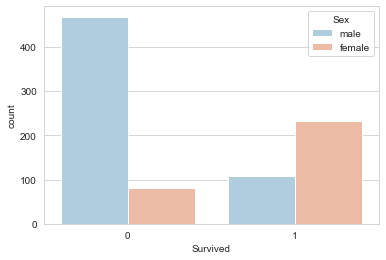

In [10]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train_data, hue='Sex',palette='RdBu_r')

<AxesSubplot:xlabel='Survived', ylabel='count'>

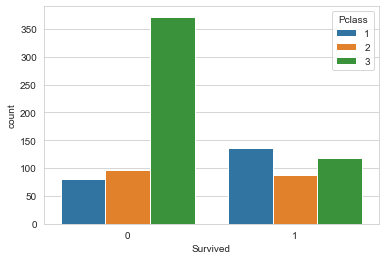

In [11]:
sns.countplot(x='Survived',data=train_data, hue='Pclass')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

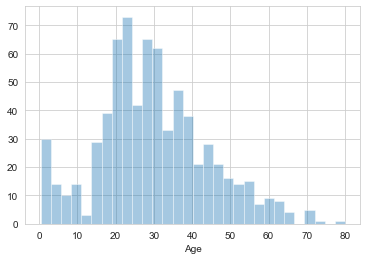

In [12]:
sns.distplot(train_data['Age'].dropna(), bins=30,kde=False)

# Missing Age Values

In some cases we can guess values for missing data based on other columns. In this sample, we want to use Cabin Class to see the average age in each class. Then we can assign the average age of each class to passengers that are in the same class but their age is missing.

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

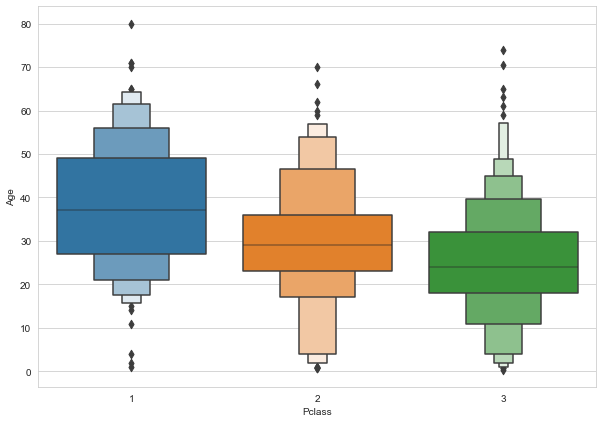

In [13]:
plt.figure(figsize=(10,7))
sns.boxenplot(x='Pclass',y='Age',data=train_data)

Now we define a function to set average age values to passengers with missing age values

In [14]:
def impute_age(cols):
    Age = cols[0]
    PClass = cols[1]
    
    if(not pd.isnull(Age)):
        return Age
    else:
        if(PClass == 1):
            return 37
        elif(PClass == 2):
            return 29
        else:
            return 24

In [15]:
train_data['Age'] = train_data[['Age','Pclass']].apply(impute_age,axis=1)

In [16]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

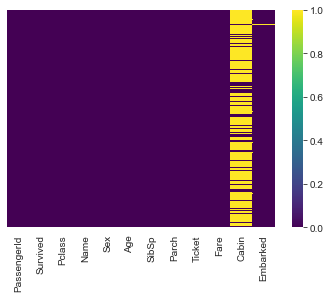

In [17]:
sns.heatmap(train_data.isnull(),cmap='viridis', yticklabels=False)

In [18]:
train_data.drop('Cabin',axis=1,inplace=True)

<AxesSubplot:>

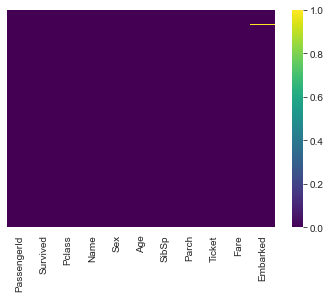

In [19]:
sns.heatmap(train_data.isnull(),cmap='viridis', yticklabels=False)

In [20]:
train_data.dropna(inplace=True)

<AxesSubplot:>

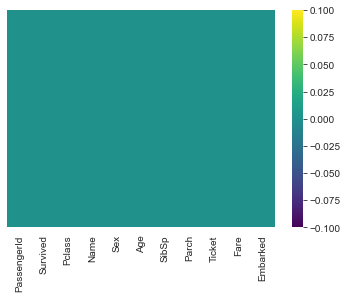

In [21]:
sns.heatmap(train_data.isnull(),cmap='viridis', yticklabels=False)

# Dummy Values

Machine Learning algorithms cannot work with categorical data like 'Male' or 'Female'. We should convert them to something like 'IsMale' with binary values 0 and 1. The new feature with new corresponding values is Dummy Value.  

It is very important to note that when you get dummies, you should drop values that are duplication of other columns. 

In [22]:
pd.get_dummies(train_data['Sex'])

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [23]:
sex = pd.get_dummies(train_data['Sex'],drop_first=True)

In [24]:
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [25]:
embark = pd.get_dummies(train_data['Embarked'],drop_first=True)

In [26]:
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [27]:
train_data = pd.concat([train_data,sex,embark],axis=1)

In [28]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [29]:
train_data.drop(['Sex','Embarked','Name','Ticket'],inplace=True,axis=1)

In [30]:
train_data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [31]:
train_data.drop(['PassengerId'],axis=1,inplace=True)

In [32]:
train_data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [33]:
train_data['Pclass'].value_counts()

3    491
1    214
2    184
Name: Pclass, dtype: int64

In [34]:
pclass = pd.get_dummies(data=train_data['Pclass'],drop_first=True)

In [35]:
train_data = pd.concat([train_data,pclass],axis=1)

In [36]:
train_data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,3,22.0,1,0,7.2500,1,0,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1,0,1
3,1,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,3,35.0,0,0,8.0500,1,0,1,0,1


In [37]:
train_data.drop(['Pclass'],axis=1,inplace=True)

In [38]:
train_data.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


In [39]:
X = train_data.drop('Survived',axis=1)
y = train_data['Survived']

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [43]:
from sklearn.linear_model import LogisticRegression

In [49]:
logmodel = LogisticRegression(solver='sag')

In [50]:
logmodel.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(solver='sag')

In [51]:
predictions = logmodel.predict(X_test)

In [53]:
from sklearn.metrics import classification_report

In [54]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.68      0.95      0.79       163
           1       0.79      0.29      0.42       104

    accuracy                           0.69       267
   macro avg       0.73      0.62      0.61       267
weighted avg       0.72      0.69      0.65       267

